## sklearn documentation: Imputing missing values, IterativeImputer (https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py)

- BayesianRidge: regularized linear regression
- DecisionTreeRegressor: non-linear regression
- ExtraTreesRegressor: similar to missForest in R
- KNeighborsRegressor: comparable to other KNN imputation approaches

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.experimental import enable_iterative_imputer
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [4]:
N_SPLITS = 5

rng = np.random.RandomState(0)

X_full, y_full = fetch_california_housing(return_X_y=True)
X_full = X_full[::10]
y_full = y_full[::10]
n_samples, n_features = X_full.shape

In [5]:
br_estimator = BayesianRidge()

score_full_data = pd.DataFrame(
cross_val_score(
br_estimator, X_full, y_full, scoring='neg_mean_squared_error', cv= N_SPLITS),columns=['Full Data'])

In [7]:
X_missing = X_full.copy()
y_missing = y_full
missing_samples = np.arange(n_samples)
missing_features = rng.choice(n_features, n_samples, replace=True)
X_missing[missing_samples, missing_features] = np.nan

In [8]:
score_simple_imputer = pd.DataFrame()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(SimpleImputer(missing_values=np.nan, strategy=strategy),br_estimator)
    score_simple_imputer[strategy] = cross_val_score(estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
                                                    cv=N_SPLITS
                                                    )

In [9]:
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]

In [11]:
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
    IterativeImputer(random_state=0, estimator=impute_estimator), br_estimator)
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
    cross_val_score(
    estimator, X_missing, y_missing, scoring='neg_mean_squared_error', cv=N_SPLITS
    )

C:\Anaconda3\envs\project\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Anaconda3\envs\project\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Anaconda3\envs\project\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Anaconda3\envs\project\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Anaconda3\envs\project\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer]

In [12]:
scores = pd.concat([
    score_full_data, score_simple_imputer, score_iterative_imputer],keys=['Original', 'SimpleImputer', 'IterativeImputer'], axis=1)

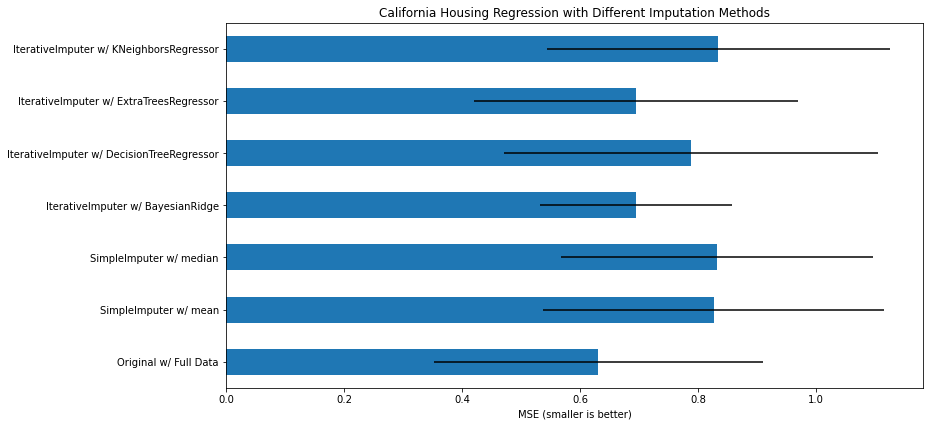

In [13]:
fig, ax = plt.subplots(figsize=(13,6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('California Housing Regression with Different Imputation Methods')
ax.set_xlabel('MSE (smaller is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()